In [32]:
import pandas as pd 

In [33]:
import numpy as np 
import seaborn as sns

In [34]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [35]:
df

price     feature1     feature2
0    461.527929   999.787558   999.766096
1    548.130011   998.861615  1001.042403
2    410.297162  1000.070267   998.844015
3    540.382220   999.952251  1000.440940
4    546.024553  1000.446011  1000.338531
..          ...          ...          ...
995  476.526078  1000.018988   999.672732
996  457.313186   998.855379  1000.020026
997  456.720992  1001.451646   998.847606
998  403.315576  1000.771023   998.562851
999  599.367093   999.232244  1001.451407

[1000 rows x 3 columns]

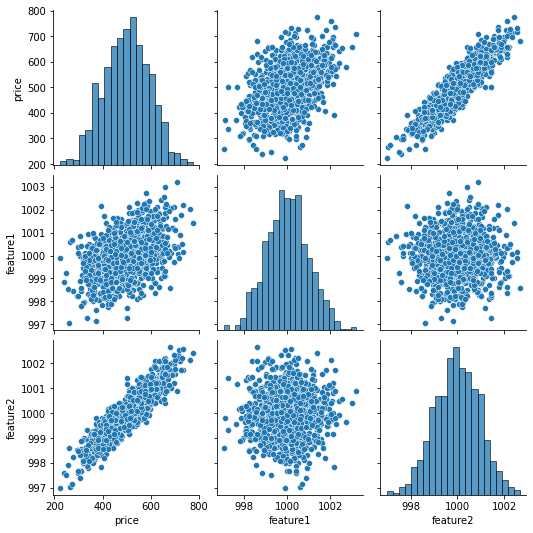

In [36]:
sns.pairplot(df)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
pip install sklearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
X = df[['feature1','feature2']].values

In [40]:
X


array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [41]:
y= df['price'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
X_train.shape


(700, 2)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [46]:
scaler = MinMaxScaler() # !st step for transformation i.e normalization 

In [47]:
scaler.fit(X_train)

MinMaxScaler()

In [48]:
X_train = scaler.transform(X_train) # final step for transformation

In [49]:
X_train.max()

1.0

In [50]:
X_test = scaler.transform(X_test)

In [51]:
X_test.max()

1.0186515935232023

In [52]:
 X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [26]:
pip install tensorflow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 217.5 MB 71 kB/s             
     |████████████████████████████████| 5.8 MB 1.9 MB/s            
     |████████████████████████████████| 126 kB 9.1 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 42 kB 2.8 MB/s            
     |████████████████████████████████| 1.4 MB 7.1 MB/s            
     |████████████████████████████████| 4.3 MB 6.1 MB/s            
     |████████████████████████████████| 57 kB 6.1 MB/s            
     |████████████████████████████████| 1.6 MB 5.1 MB/s            
     |████████████████████████████████| 3.1 MB 7.1 MB/s            
     |████████████████████████████████| 462 kB 6.0 MB/s            
     |█████████████

  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https:/

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [53]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [54]:
model = Sequential()

In [55]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

In [56]:
model.compile(optimizer='rmsprop', loss='mse')

In [57]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 821us/step - loss: 256712.8906
Epoch 2/250
22/22 [==============================] - 0s 904us/step - loss: 256648.6094
Epoch 3/250
22/22 [==============================] - 0s 881us/step - loss: 256571.9375
Epoch 4/250
22/22 [==============================] - 0s 883us/step - loss: 256501.9688
Epoch 5/250
22/22 [==============================] - 0s 786us/step - loss: 256428.5000
Epoch 6/250
22/22 [==============================] - 0s 806us/step - loss: 256349.4844
Epoch 7/250
22/22 [==============================] - 0s 808us/step - loss: 256264.9375
Epoch 8/250
22/22 [==============================] - 0s 823us/step - loss: 256173.9688
Epoch 9/250
22/22 [==============================] - 0s 814us/step - loss: 256076.0156
Epoch 10/250
22/22 [==============================] - 0s 817us/step - loss: 255970.8594
Epoch 11/250
22/22 [==============================] - 0s 736us/step - loss: 255856.2344
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 742us/step - loss: 68682.5234
Epoch 95/250
22/22 [==============================] - 0s 774us/step - loss: 63984.3555
Epoch 96/250
22/22 [==============================] - 0s 831us/step - loss: 59365.6914
Epoch 97/250
22/22 [==============================] - 0s 799us/step - loss: 54813.0039
Epoch 98/250
22/22 [==============================] - 0s 762us/step - loss: 50325.7930
Epoch 99/250
22/22 [==============================] - 0s 767us/step - loss: 45932.6055
Epoch 100/250
22/22 [==============================] - 0s 806us/step - loss: 41637.9336
Epoch 101/250
22/22 [==============================] - 0s 769us/step - loss: 37458.1602
Epoch 102/250
22/22 [==============================] - 0s 765us/step - loss: 33443.4883
Epoch 103/250
22/22 [==============================] - 0s 783us/step - loss: 29552.2168
Epoch 104/250
22/22 [==============================] - 0s 793us/step - loss: 25852.0859
Epoch 105/250
22/22 [==============================

22/22 [==============================] - 0s 740us/step - loss: 379.2103
Epoch 189/250
22/22 [==============================] - 0s 776us/step - loss: 366.4479
Epoch 190/250
22/22 [==============================] - 0s 779us/step - loss: 353.8862
Epoch 191/250
22/22 [==============================] - 0s 798us/step - loss: 341.6392
Epoch 192/250
22/22 [==============================] - 0s 813us/step - loss: 327.8731
Epoch 193/250
22/22 [==============================] - 0s 781us/step - loss: 315.6004
Epoch 194/250
22/22 [==============================] - 0s 767us/step - loss: 305.0614
Epoch 195/250
22/22 [==============================] - 0s 758us/step - loss: 294.7942
Epoch 196/250
22/22 [==============================] - 0s 784us/step - loss: 284.1884
Epoch 197/250
22/22 [==============================] - 0s 803us/step - loss: 273.8949
Epoch 198/250
22/22 [==============================] - 0s 792us/step - loss: 262.3453
Epoch 199/250
22/22 [==============================] - 0s 791us/step

In [58]:
loss_df = pd.DataFrame(model.history.history)

In [59]:
loss_df

loss
0    256712.890625
1    256648.609375
2    256571.937500
3    256501.968750
4    256428.500000
..             ...
245      28.491323
246      27.611370
247      27.437950
248      26.914288
249      26.469685

[250 rows x 1 columns]

<AxesSubplot:>

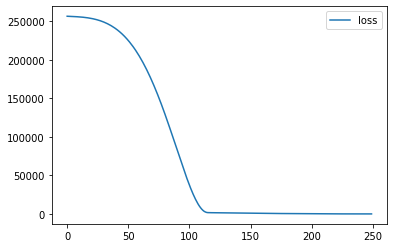

In [60]:
loss_df.plot()

In [61]:
loss_df

loss
0    256712.890625
1    256648.609375
2    256571.937500
3    256501.968750
4    256428.500000
..             ...
245      28.491323
246      27.611370
247      27.437950
248      26.914288
249      26.469685

[250 rows x 1 columns]

In [62]:
x_test

NameError: name 'x_test' is not defined

In [63]:
X_test

array([[ 0.39533339,  0.38540671],
       [ 0.57300502,  0.74070924],
       [ 0.61294076,  0.65734264],
       [ 0.38169528,  0.73076311],
       [ 0.07776591,  0.46323644],
       [ 0.49421971,  0.68949258],
       [ 0.2065742 ,  0.70096247],
       [ 0.55141988,  0.41776773],
       [ 0.36812191,  0.69082394],
       [ 0.56465724,  0.3877465 ],
       [ 0.57048029,  0.71810824],
       [ 0.79569525,  0.47979901],
       [ 0.38488235,  0.41856516],
       [ 0.33142545,  0.42411972],
       [ 0.89361377,  0.63912775],
       [ 0.50191166,  0.39789174],
       [ 0.7159808 ,  0.43688384],
       [ 0.35812192,  0.92028225],
       [ 0.49989367,  0.85589311],
       [ 0.63965434,  0.59024789],
       [ 0.19053626,  0.34203634],
       [ 0.40982896,  0.45849208],
       [ 0.26844791,  0.40167269],
       [ 0.38649709,  0.33592759],
       [ 0.50654703,  0.65789843],
       [ 0.41260556,  0.79338075],
       [ 0.45631316,  0.61323307],
       [ 0.44064792,  0.40889315],
       [ 0.42963904,

In [64]:
y_test

array([402.29631873, 624.15619847, 582.4550663 , 578.58860646,
       371.22410361, 584.38110772, 514.40564086, 464.11587006,
       551.65009963, 451.8041724 , 613.95995262, 547.73198239,
       428.31614877, 413.84178036, 654.83912076, 429.21452014,
       512.04904895, 657.71868008, 674.31102047, 565.19184559,
       338.0902386 , 450.9760715 , 375.13754715, 379.10982057,
       562.05793604, 593.6677957 , 531.27754687, 423.65453319,
       656.65474461, 412.90687671, 439.49653517, 488.78691774,
       448.51914416, 685.21654079, 424.81078609, 418.45717839,
       507.44318662, 550.14246248, 503.21614081, 397.88209319,
       621.11885596, 411.57560703, 609.3840753 , 449.02606966,
       503.51419982, 578.32901814, 664.50877632, 498.6284209 ,
       316.9505926 , 478.35823792, 514.89474416, 374.19760282,
       531.66193891, 405.40016562, 637.30962074, 482.55641188,
       624.99250404, 624.24709206, 455.13953399, 484.46159148,
       492.93591939, 477.73749721, 689.1734889 , 397.62

In [65]:
model.evaluate(X_test,y_test,verbose=0)

27.481943130493164

In [66]:
model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 818us/step - loss: 26.9457


26.945728302001953

In [77]:
test_predictions = model.predict(X_test)


In [78]:

test_predictions.shape
test_predictions = pd.Series(test_predictions.reshape(300,))


In [80]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])


In [81]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [82]:
pred_df

Test True Y           0
0     402.296319  406.203400
1     624.156198  621.177795
2     582.455066  589.950317
3     578.588606  571.298645
4     371.224104  369.381317
..           ...         ...
295   525.704657  528.668396
296   502.909473  516.668030
297   612.727910  607.354187
298   417.569725  417.096405
299   410.538250  412.192261

[300 rows x 2 columns]

In [88]:
pred_df.columns = ['Test True Y','Model Predictions']

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

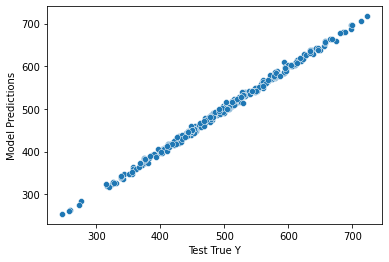

In [89]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [91]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.262484179339338

In [92]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [94]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.242322982232593

In [97]:
new_gem = [[998,1000]]


In [98]:
new_gem=scaler.transform(new_gem)

In [99]:
new_gem

array([[0.14117652, 0.53968792]])

In [100]:
model.predict(new_gem)

array([[421.5652]], dtype=float32)

In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save('my_gem_model.h5')